### Titanic Survivors
- Firstly, we need to prepare data
- Choose model
- Train model
- Model deployment


### Preparing Data
Importing numpy and pandas to read and perform operations on the csv files given

In [23]:
import numpy as np
import pandas as pd

In [24]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")


In [25]:
train_data.columns # we have 12 columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
train_data.info() #we can see there are null objects in age,cabin,embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
total = train_data.isna().sum().sort_values(ascending=False)
total #we can drop cabin as more than 70 percent of data is missing

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

- Let us draw somoe comparisons between factors and check their relation with survival

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns #for daata visualization

C:\Users\sahithisai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

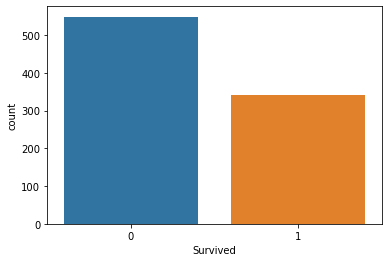

In [29]:
sns.countplot(train_data['Survived'],label="Count")

C:\Users\sahithisai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahithisai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sahithisai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

Text(0.5, 1.0, 'Male')

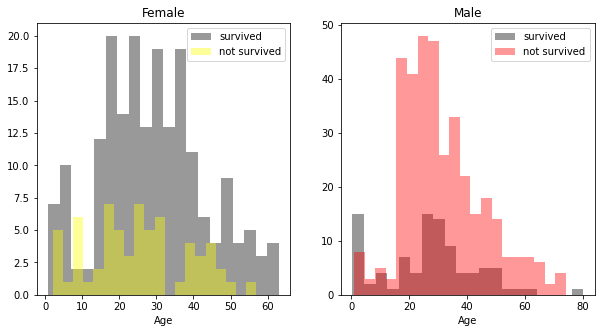

In [30]:
fig , axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(),kde=False,label="survived",bins=20,ax=axes[0],color="black")
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(),kde=False,label="not survived",bins=20,ax=axes[0],color="yellow")
ax.legend()
ax.set_title("Female")
ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(),kde=False,label="survived",bins=20,ax=axes[1],color="black")
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(),kde=False,label="not survived",bins=20,ax=axes[1],color="red")
ax.legend()
ax.set_title("Male")


In [31]:
train_data.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\sahithisai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahithisai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahithisai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahithi

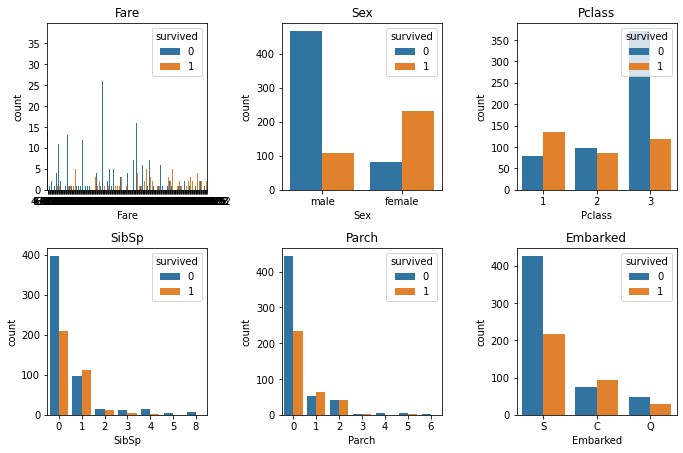

In [32]:
cols = ['Fare','Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols + c #index to go through the number of columns       
        ax = axs[r][c] # Show where to position each subplot
        sns.countplot(train_data[cols[i]], hue=train_data["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()

- dropping and filling data

In [33]:
train_data = train_data.drop(['PassengerId'],axis=1)
#it is different and independant to survival rate
train_data = train_data.drop(['Cabin'], axis = 1)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [34]:
data = [train_data,test_data]
for x in data:
    mean = train_data['Age'].mean()
    std = test_data['Age'].std()
    null = x['Age'].isnull().sum()
    #generating random age
    randage = np.random.randint(mean-std,mean+std)
    #filling values
    age_modified = x['Age'].copy()
    age_modified[np.isnan(age_modified)] = randage
    x['Age'] = age_modified
    x['Age'] = train_data['Age'].astype(int)

In [35]:
train_data['Age'].isnull().sum()

0

In [36]:
#to fill embarked column lets check most frequent value
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [37]:
most_frequent = 'S'
for x in data:
    x['Embarked'] = x['Embarked'].fillna(most_frequent)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 66.3+ KB


In [38]:
#we need to get everything to int
for x in data:
    x['Fare'] = x['Fare'].fillna(0)
    x['Fare'] = x['Fare'].astype(int)

In [39]:
train_data['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [40]:
genders = {"male": 0, "female": 1}
data = [train_data,test_data]
for x in data:
    x['Sex'] = x['Sex'].map(genders)

In [41]:
x["Sex"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [42]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [43]:
train_data = train_data.drop(['Ticket'],axis = 1)
test_data = test_data.drop(['Ticket'],axis = 1)

In [44]:
data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [46]:
train_data['Age'].value_counts()

6    325
4    126
3    106
5    103
2     92
1     71
0     68
Name: Age, dtype: int64

In [49]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,2,1,0,7,0
1,1,1,1,5,1,0,71,1
2,1,3,1,3,0,0,7,0
3,1,1,1,5,1,0,53,0
4,0,3,0,5,0,0,8,0
5,0,3,0,6,0,0,8,2
6,0,1,0,6,0,0,51,0
7,0,3,0,0,3,1,21,0
8,1,3,1,3,0,2,11,0
9,1,2,1,1,1,0,30,1


In [48]:
train_data = train_data.drop(['Name'],axis = 1)
test_data = test_data.drop(['Name'],axis = 1)

In [50]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

In [59]:
test_data.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,2,0,0,7,NaN,2
1,893,3,1,5,1,0,7,NaN,0
2,894,2,0,3,0,0,9,NaN,2
3,895,3,0,5,0,0,8,NaN,0
4,896,3,1,5,1,1,12,NaN,0
5,897,3,0,6,0,0,9,NaN,0
6,898,3,1,6,0,0,7,NaN,2
7,899,2,0,0,1,1,29,NaN,0
8,900,3,1,3,0,0,7,NaN,1
9,901,3,0,1,2,0,24,NaN,0


In [51]:

from sklearn.ensemble import RandomForestClassifier

In [62]:
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
features = ["Pclass","Sex","Age","SibSp","Parch","Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model.fit(X,Y_train)
predictions = model.predict(X_test)

In [64]:
importances = pd.DataFrame({'feature':features,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(30)

,importance
feature,
Sex,0.529
Pclass,0.208
Age,0.092
SibSp,0.073
Parch,0.055
Embarked,0.043


In [65]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
#saving output to csv file
output = pd.DataFrame({'PassengerId' : test_data.PassengerId,'Survived' : predictions})
output.to_csv("submit.csv")


In [67]:
#saving as pkl file
import pickle as pkl 

logistic_models=RandomForestClassifier()
logistic_models.fit(X,Y_train)

filename="logistical_model.pkl"

pkl.dump(logistic_models,open(filename,"wb"))# wb mean write as binary